In [1]:
library(tidyverse)
library(dplyr)

Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

In [2]:
color_dict = c(
    "CellFlow"= "#B12F8C",
    "Mean model 1"= "#8F97A8",
    "Mean model 2"= "#566573",
    "Identity"="#BDBDBD")

In [3]:
output_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/figures/pbmc_new_cytokine/benchmark"

In [4]:
df <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/pbmc/results/allocation/metrics_new_cytokine.csv")

New names:
• `` -> `...1`
Rows: 9468 Columns: 177
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): ...1, Unnamed: 0, predicted_deg_genes, wandb_name, donors_in_trai...
dbl (167): mean_decoded_r_sq_per_cell_type, mean_e_distance_per_cell_type, m...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
df$method <- factor(df$method, 
                                levels = c("id", "m1", "m2", "cf"),
                                labels = c("Identity", "Mean model 1", "Mean model 2", "CellFlow"))  # Correct factorization


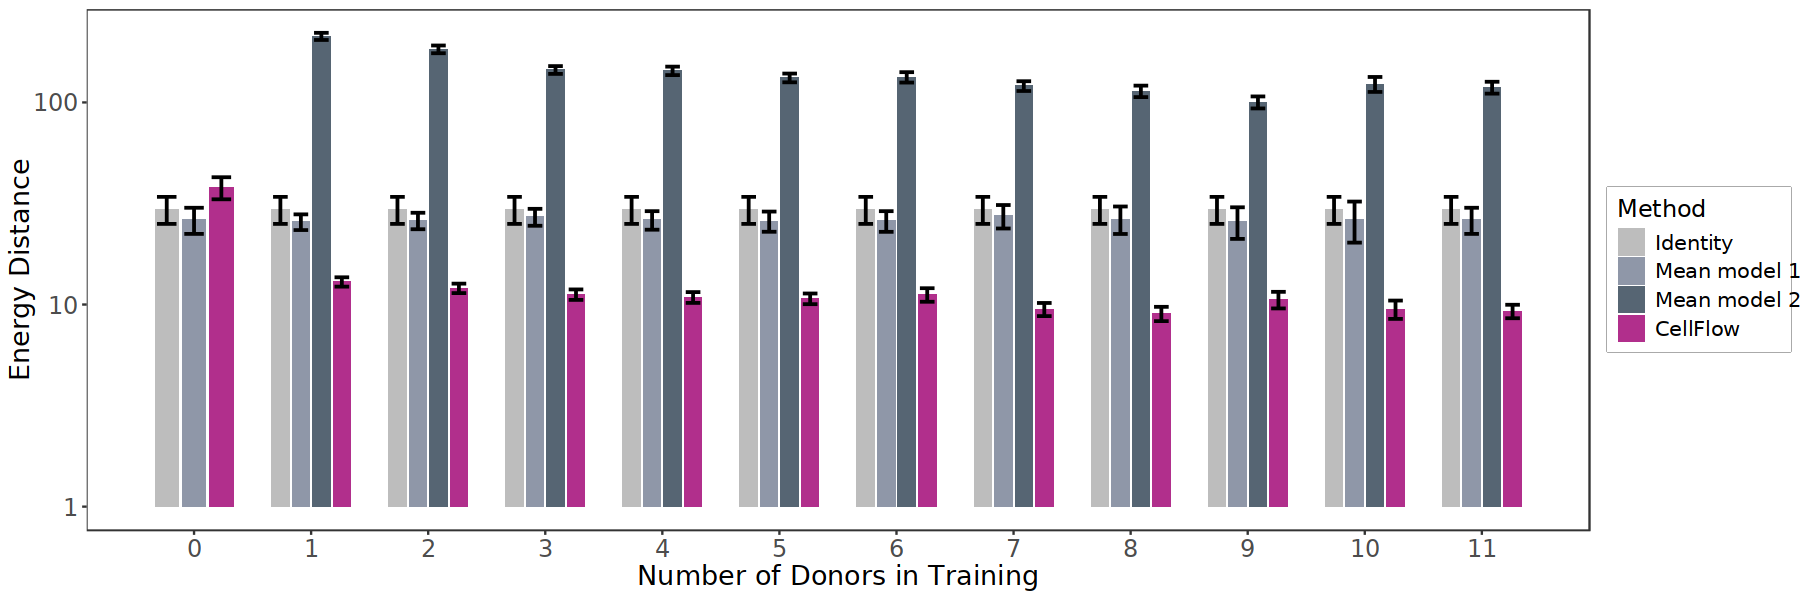

In [6]:
options(repr.plot.width = 15, repr.plot.height = 5)

df_summary <- df %>%
  group_by(num_donors_in_train, method) %>%
  summarise(
    mean_ood_e_distance = mean(ood_e_distance, na.rm = TRUE),
    se = sd(ood_e_distance, na.rm = TRUE) / sqrt(n()),  # Standard error
    .groups = 'drop'
  )

p <- ggplot(df_summary, aes(x=num_donors_in_train, y=mean_ood_e_distance, fill=method)) +
  geom_bar(
    stat="identity", 
    position=position_dodge(0.7), 
    width=0.6  # Bar width
  ) +
  geom_errorbar(
    aes(ymin = mean_ood_e_distance - se, ymax = mean_ood_e_distance + se),
    position=position_dodge(0.7),  # Align error bars with bars
    width=0.5,  # Width of error bar caps
    linewidth=0.8,
  ) +
  labs(
    x="Number of Donors in Training",
    y="Energy Distance",
    fill="Method"
  ) +
scale_y_log10() +
scale_x_continuous(
        breaks = unique(df_summary$num_donors_in_train)  # Ensure all unique x values are displayed
      ) +
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  theme_bw() +
  theme(
    axis.title.x = element_text(size=16),
    axis.title.y = element_text(size=16),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )
p


In [7]:
ggsave(file.path(output_dir, "E_distance.pdf"), plot = p, device = "pdf",width = 15, height = 5)

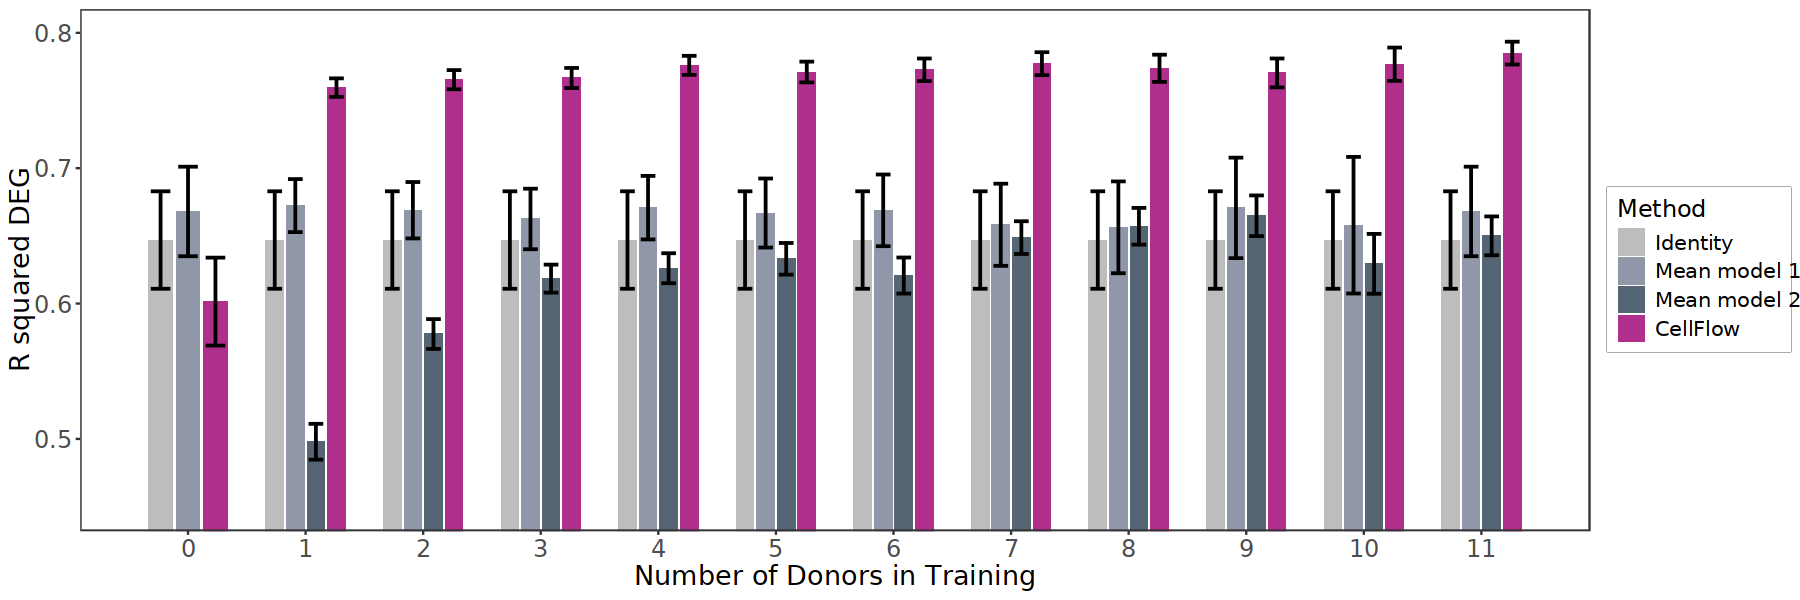

In [8]:
df_summary <- df %>%
  group_by(num_donors_in_train, method) %>%
  summarise(
    mean_mean_deg_r_sq_per_cell_type = mean(mean_deg_r_sq_per_cell_type, na.rm = TRUE),
    se = sd(mean_deg_r_sq_per_cell_type, na.rm = TRUE) / sqrt(n()),  # Standard error
    .groups = 'drop'
  )


p <- ggplot(df_summary, aes(x=num_donors_in_train, y=mean_mean_deg_r_sq_per_cell_type, fill=method)) +
  geom_bar(
    stat="identity", 
    position=position_dodge(0.7), 
    width=0.6  # Bar width
  ) +
  geom_errorbar(
    aes(ymin = mean_mean_deg_r_sq_per_cell_type - se, ymax = mean_mean_deg_r_sq_per_cell_type + se),
    position=position_dodge(0.7),  # Align error bars with bars
    width=0.5,  # Width of error bar caps
    linewidth=0.8,
  ) +
  labs(
    x="Number of Donors in Training",
    y="R squared DEG",
    fill="Method"
  ) +
  scale_fill_manual(values=color_dict) +  # Replace with your actual color dictionary
  theme_bw() +
    scale_x_continuous(
        breaks = unique(df_summary$num_donors_in_train)  # Ensure all unique x values are displayed
      ) +
  theme(
    axis.title.x = element_text(size=16),
    axis.title.y = element_text(size=16),
    axis.text.x = element_text(size=14),
    axis.text.y = element_text(size=14),
    legend.title = element_text(size=14),
    legend.text = element_text(size=12),
    legend.position = "right",
    legend.box.background = element_rect(color="black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  coord_cartesian(ylim = c(0.45, 0.8))  # Set y-axis limits without truncating data
p


In [9]:
ggsave(file.path(output_dir, "r_squared_deg.pdf"), plot = p, device = "pdf",width = 15, height = 5)